<a href="https://colab.research.google.com/github/schmelto/machine-learning/blob/main/Deeplearning/Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizer


In [1]:
%tensorflow_version 2.x # Command for Google Colab for Tensorflow 2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Command for Google Colab for Tensorflow 2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Loading the MNIST data set

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras \
  .datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Here the MNIST data is normalized so that it is only saved as a float from 0 to 1

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Definition of the models

The models can be generated using the `get_model()` function and consist of 2 dense layers with Relu and Sigmoid functions

In [5]:
def get_model():
  return keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
  ])

model_sgd = get_model() # Model with Stochastic Gradient Descent Optimizer
model_adam = get_model() # Model with Adam Optimizer
model_rmsprop = get_model() # Model with RMSProp Optimizer

## Compile the models

For each of the models, Stochastic Gradient Descent is used as an optimizer and the loss function that fits the model

This is set in the `model.compile()` function

In [6]:
model_adam.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_rmsprop.compile(
    optimizer='rmsprop',
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_sgd.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy']
)

models = [model_adam, model_rmsprop, model_sgd]

### Conversion of the labels into categorical labels

In [7]:
_train_labels = keras.utils.to_categorical(train_labels, 10)
_test_labels = keras.utils.to_categorical(test_labels, 10)

## Training the models
The training results are saved in the history list.
All models are trained here and the training results are saved in the history list

In [8]:
epochs=15
history = [model.fit(train_images, _train_labels, epochs=epochs, validation_data=(test_images, _test_labels), verbose=True) for model in models]

Epoch 1/15
1875/1875 [==============================] - 6s 2ms/step - loss: 0.0298 - accuracy: 0.8301 - val_loss: 0.0084 - val_accuracy: 0.9545
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0077 - accuracy: 0.9573 - val_loss: 0.0060 - val_accuracy: 0.9669
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0053 - accuracy: 0.9725 - val_loss: 0.0051 - val_accuracy: 0.9724
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9795 - val_loss: 0.0049 - val_accuracy: 0.9741
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0034 - accuracy: 0.9833 - val_loss: 0.0043 - val_accuracy: 0.9764
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0028 - accuracy: 0.9863 - val_loss: 0.0040 - val_accuracy: 0.9794
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 0.9883 - val_loss: 0.0039 - val_accuracy:

## Plot the results with matplotlib

The individual results of the models are integrated in different colors via `plt.plot`.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

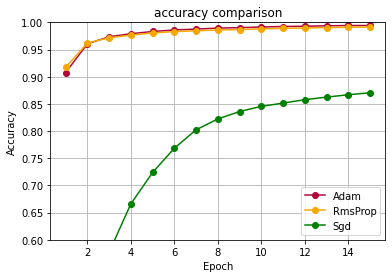

In [9]:
def plot_learning_curve(ylim=0.6):
    plt.figure()
    plt.title("accuracy comparison")
    axes = plt.gca()
    axes.set_ylim([ylim, 1])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    train_sizes = np.arange(1, 1 + len(history[0].history['accuracy']))

    plt.grid()

    plt.plot(
        train_sizes,
        history[0].history['accuracy'],
        'o-',
        color=(177/255, 6/255, 58/255),
        label="Adam"
    )
    plt.plot(
        train_sizes,
        history[1].history['accuracy'],
        'o-',
        color=(246/255, 168/255, 0),
        label="RmsProp"
    )
    
    plt.plot(
        train_sizes,
        history[2].history['accuracy'],
        'o-',
        color='green',
        label="Sgd"
    )

    plt.legend(loc="best")
    return plt

plot_learning_curve()


## Evaluation

- Stochastic Gradient Descent
always leads to the optimal solution, even if the whole thing can be a little slower.

- With strange data sets can
the momentum is causing problems
and with SGD you get the correct solution. The choice of optimizer remains problem-dependent